In [2]:
import pandas as pd
ageinc_df = pd.read_csv('ageinc.csv')
ageinc_df.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


### 处理数据，规范数据维度

In [3]:
#创建z score来统一income和age的标准
ageinc_df['z_income']=(ageinc_df['income']-ageinc_df['income'].mean())/ageinc_df['income'].std()
ageinc_df['z_age']=(ageinc_df['age']-ageinc_df['age'].mean())/ageinc_df['age'].std()
ageinc_df.head()

,income,age,z_income,z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064


### 使用散点图展示数据

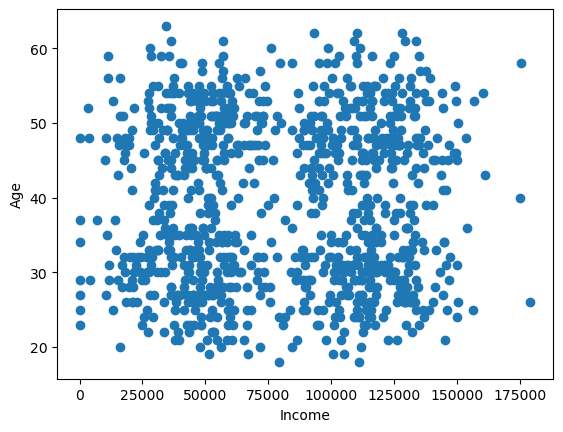

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
#用散点图展示income和age的数据
plt.scatter(ageinc_df['income'],ageinc_df['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

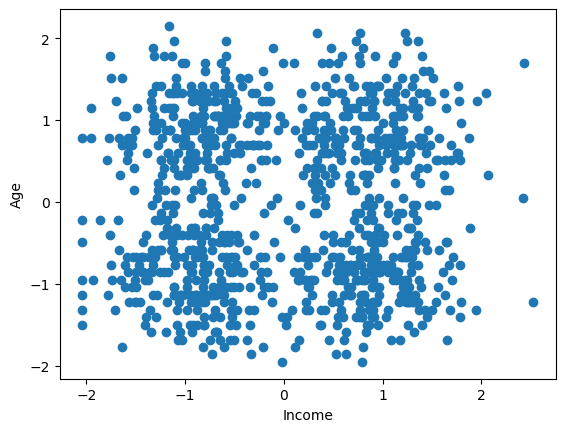

In [7]:
#对标准化后的数据进行散点图展示
plt.scatter(ageinc_df['z_income'],ageinc_df['z_age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

### 上述图形显示有四组，因此使用K-means分类算法分类，将k设置为4

In [8]:
from sklearn import cluster

#定义分为4类，传入标准化的z_income和z_age数据作为x，y
model = cluster.KMeans(n_clusters=4, random_state=10)
model.fit(ageinc_df[['z_income','z_age']])

KMeans(n_clusters=4, random_state=10)

In [9]:
#新增加一列cluster，将上面model分类的标签传入
ageinc_df['cluster']=model.labels_
ageinc_df.head()

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,2
1,49597,27,-0.777331,-1.130565,3
2,36517,52,-1.110474,1.146963,1
3,33223,49,-1.194372,0.873660,1
4,72994,53,-0.181416,1.238064,1


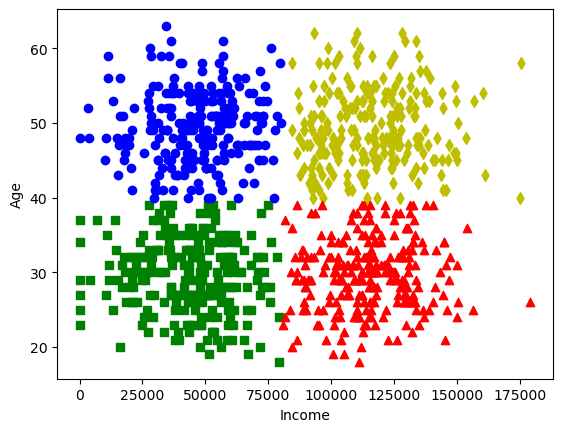

In [29]:
#设置4个分类的颜色和point形状
colors = ['r', 'b', 'y', 'g']
markers = ['^', 'o', 'd', 's']


#遍历每个cluster，对相同的
for c in ageinc_df['cluster'].unique():
    #相同cluster数字的分为一组，存入d
    d = ageinc_df[ageinc_df['cluster'] == c]
    #针对每个分组，赋予不同的颜色和形状
    plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])
    
#设置x，y坐标轴名称，并展示
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()